In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


def plot_agg_fun_performance(metric_column, datasets, agg_fun_labels, csv_paths, save_name):
    """
    绘制多个数据集在不同聚合函数下的性能指标趋势图（固定样式和范围）
    
    参数:
        metric_column (str): 性能指标列名（如'acc'）
        datasets (list): 数据集名称列表（如['fakeddit', 'recovery', 'covid']）
        agg_fun_labels (list): 聚合函数标签（X轴分类，如['softmax_then_sum', 'mean', 'sum']）
        csv_paths (list): 每个数据集对应的CSV文件路径列表（与datasets顺序一致）
        save_name (str): 图像保存路径

    配色：marker_colors = ['#2E8B57', '#376795', '#B91419']
    """
    # 固定样式配置（与原代码一致）
    markers = ['o', 's', 'h']  # 圆形、方形、三角形标记
    marker_colors = ['#2E8B57', '#376795', '#B91419']  # 固定填充颜色
    dataset_labels = ['Fakeddit', 'ReCOVery', 'MM-COVID19']  # 固定显示名称
    y_limits = [
        (0.9511, 0.9522),  # fakeddit的Y轴范围
        (0.9385, 0.975),   # recovery的Y轴范围
        (0.9410, 0.983)    # covid的Y轴范围
    ]

    # 字体设置
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 18

    # 初始化3个子图（纵向排列，与原代码一致）
    fig, axes = plt.subplots(3, 1, figsize=(5, 6), sharey=False)

    # 遍历每个数据集绘图
    for j, (dataset, ax, csv_path, marker, marker_color, dataset_label, y_lim) in enumerate(
            zip(datasets, axes, csv_paths, markers, marker_colors, dataset_labels, y_limits)):
        # 读取数据并按聚合函数顺序排序
        data = pd.read_csv(csv_path)
        x_sorted = pd.Categorical(data['agg_fun'], categories=agg_fun_labels, ordered=True)
        data_sorted = data.iloc[x_sorted.argsort()]

        # 绘制折线图
        ax.plot(
            data_sorted['agg_fun'], data_sorted[metric_column],
            marker=marker, color=marker_color,
            markeredgecolor='white', markersize=12,
            label=dataset_label
        )

        # 设置Y轴范围
        ax.set_ylim(y_lim)

        # 设置X轴标签（仅最下方子图显示）
        if j != 2:  # 前两个子图隐藏X轴标签
            ax.set_xticklabels([])
            ax.tick_params(axis='x', colors='lightgray')
        else:  # 最下方子图显示X轴标签
            ax.set_xticks(range(len(agg_fun_labels)))
            ax.set_xticklabels(agg_fun_labels, size=18)
            ax.xaxis.tick_bottom()

        # 设置边框可见性
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if j != 2:  # 前两个子图隐藏底部边框
            ax.spines['bottom'].set_visible(False)

        # 添加图例（最后一个子图字体稍小）
        legend_fontsize = 19 if j == 2 else 20
        ax.legend(
            fontsize=legend_fontsize, loc='upper right',
            borderpad=0.15, handlelength=1.0, handletextpad=0.2
        )

        # 绘制子图角落斜线段
        d = 0.02
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)
        ax.plot((-d, +d), (-d, +d), **kwargs)

        # 设置刻度和网格
        ax.tick_params(axis='both', which='major', labelsize=16)
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        ax.grid(color='lightgray', linestyle='--')

    # 调整布局和Y轴格式
    fig.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.3)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # 保存并显示
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

    return fig


In [ ]:
 plot_agg_fun_performance(
    metric_column='acc',
    datasets=['fakeddit', 'recovery', 'covid'],
    agg_fun_labels=['softmax_then_sum', 'mean', 'sum'],
    csv_paths=[
        'fakeddit-sens-agg_fun.csv',
        'recovery-sens-agg_fun.csv',
        'covid-sens-agg_fun.csv'
    ],
    save_name='all_datasets_acc_sens-agg_fun.pdf'
)

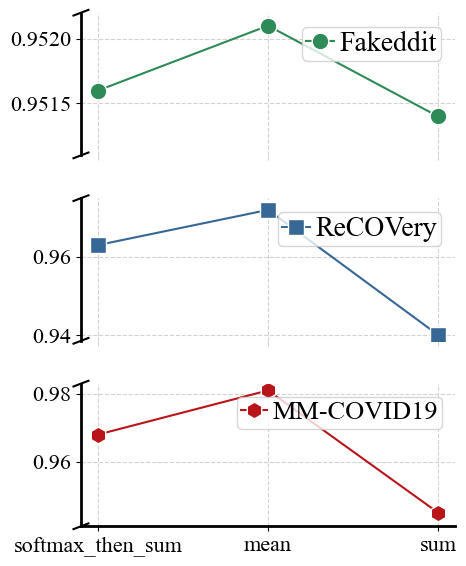

In [2]:
#以下是为了呈现画图效果和适应编造数据的改版
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import pandas as pd
import numpy as np

# 编造数据：每个数据集在3种聚合函数下的准确率（acc）
# 1. fakeddit数据集：准确率整体高且波动小，mean聚合略优
fakeddit_data = pd.DataFrame({
    'agg_fun': ['softmax_then_sum', 'mean', 'sum'],
    'acc': [0.9516, 0.9521, 0.9514]  # 符合axes[0]的y轴范围（0.9511~0.9522）
})

# 2. recovery数据集：准确率中等，sum聚合性能较低
recovery_data = pd.DataFrame({
    'agg_fun': ['softmax_then_sum', 'mean', 'sum'],
    'acc': [0.963, 0.972, 0.940]  # 符合axes[1]的y轴范围（0.9385~0.975）
})

# 3. covid数据集：准确率较高，mean聚合最优
covid_data = pd.DataFrame({
    'agg_fun': ['softmax_then_sum', 'mean', 'sum'],
    'acc': [0.968, 0.981, 0.945]  # 符合axes[2]的y轴范围（0.9410~0.983）
})

# 按代码中csv_paths的顺序，整理为数据集-DataFrame映射
data_dict = {
    'fakeddit': fakeddit_data,
    'recovery': recovery_data,
    'covid': covid_data
}
# 设置参数（保持不变）
metric_columns = 'acc'
datasets = ['fakeddit', 'recovery', 'covid']
agg_fun_labels = ['softmax_then_sum', 'mean', 'sum']
save_name = 'all_datasets_acc_sens-agg_fun.pdf'

# 绘图设置
marker_edge = 'white'
markers = ['o', 's', 'h']
marker_colors = ['#2E8B57', '#376795', '#B91419']
dataset_labels = ['Fakeddit', 'ReCOVery', 'MM-COVID19']

# 字体设置
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

# 初始化3个子图（纵向排列）
fig, axes = plt.subplots(3, 1, figsize=(5, 6), sharey=False)

# 遍历数据集绘图（使用data_dict替代CSV读取）
for j, (dataset, ax, marker, marker_color, dataset_label) in enumerate(
        zip(datasets, axes, markers, marker_colors, dataset_labels)):
    # 从数据字典中获取当前数据集的DataFrame
    data = data_dict[dataset]
    x = data['agg_fun']
    y = data[metric_columns]

    # 按预设聚合函数顺序排序
    x_sorted = pd.Categorical(x, categories=agg_fun_labels, ordered=True)
    data_sorted = data.iloc[x_sorted.argsort()]

    # 绘制折线图
    ax.plot(
        data_sorted['agg_fun'], data_sorted[metric_columns],
        marker=marker, color=marker_color,
        markeredgecolor=marker_edge, markersize=12,
        label=dataset_label
    )

# 单独设置每个子图的Y轴范围（适配数据）
axes[0].set_ylim(0.9511, 0.9522)
axes[1].set_ylim(0.9385, 0.975)
axes[2].set_ylim(0.9410, 0.983)

# X轴标签设置（仅最下方子图显示标签）
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticks(range(len(agg_fun_labels)))
axes[2].set_xticklabels(agg_fun_labels, size=18)

# 边框可见性设置
axes[0].spines[['top', 'bottom', 'right']].set_visible(False)
axes[1].spines[['top', 'bottom', 'right']].set_visible(False)
axes[2].spines[['top', 'right']].set_visible(False)
axes[2].xaxis.tick_bottom()

# 添加图例
for ax, font_size in zip(axes, [20, 20, 19]):
    ax.legend(
        fontsize=font_size, loc='upper right',
        borderpad=0.15, handlelength=1.0, handletextpad=0.2
    )

# 绘制子图角落的斜线段（装饰）
d = 0.02
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (1 - d, 1 + d), **kwargs)
axes[0].plot((-d, +d), (-d, +d), **kwargs)
kwargs.update(transform=axes[1].transAxes)
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)
axes[1].plot((-d, +d), (-d, +d), **kwargs)
kwargs.update(transform=axes[2].transAxes)
axes[2].plot((-d, +d), (1 - d, 1 + d), **kwargs)
axes[2].plot((-d, +d), (-d, +d), **kwargs)

# 刻度和网格设置
for ax_ in axes:
    ax_.tick_params(axis='both', which='major', labelsize=16)
    for spine in ax_.spines.values():
        spine.set_linewidth(2)
    ax_.grid(color='lightgray', linestyle='--')

axes[0].tick_params(axis='x', colors='lightgray')
axes[1].tick_params(axis='x', colors='lightgray')

# 调整布局和Y轴格式
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.3)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# 保存并显示
plt.savefig(save_name, bbox_inches='tight')
plt.show()